## TASK1 

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 2
- Generate the following and explain your findings:
- 
For the "Median value of owner-occupied homes" provide a boxplt- 

Provide a  bar plot for the Charles river varib- le

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and yonger, between 35 and 70 years and 70 years and l- der)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relato- nship?

Create a histogram for the pupil to teacher rativariable



## Task3

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#from js import fetch
df=pd.read_csv('boston_housing.csv')

In [3]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


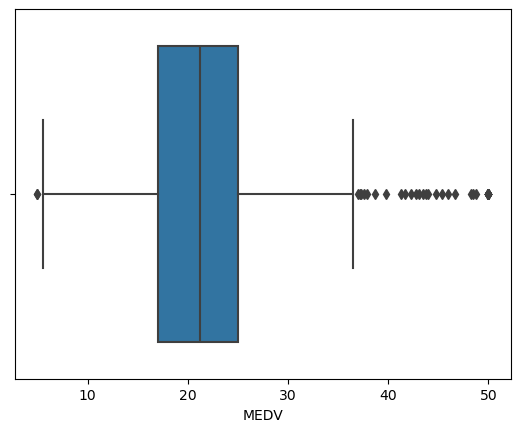

In [4]:
#For the "Median value of owner-occupied homes" provide a boxplt-
box_plot1=sns.boxplot(data=df,x='MEDV')

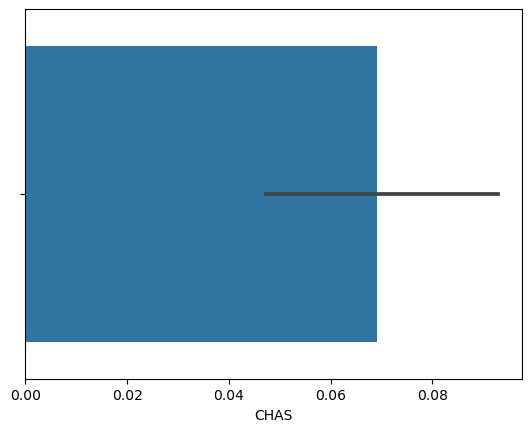

In [5]:
#Provide a bar plot for the Charles river varible
barplot=sns.barplot(data=df,x='CHAS')

C:\Users\Mayank\anaconda3034\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


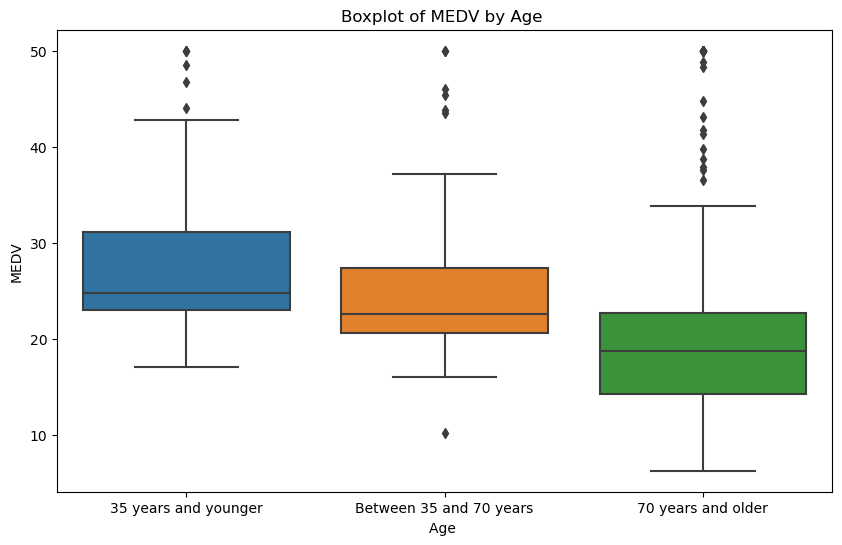

In [6]:
#Provide a boxplot for the MEDV variable vs the AGE variable.
#(Discretize the age variable into three groups of 35 years and yonger, between 35 and 70 years and 70 years and l- der)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming df is your DataFrame and it contains the columns 'MEDV' and 'AGE'
# If you don't have the DataFrame, you need to load your data into df first.
# Discretize the AGE variable into three groups
bins = [0, 35, 70, df['AGE'].max()]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
df['AGE_group'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=df)
plt.title('Boxplot of MEDV by Age ')
plt.xlabel('Age ')
plt.ylabel('MEDV')
plt.show()


<Axes: xlabel='INDUS', ylabel='NOX'>

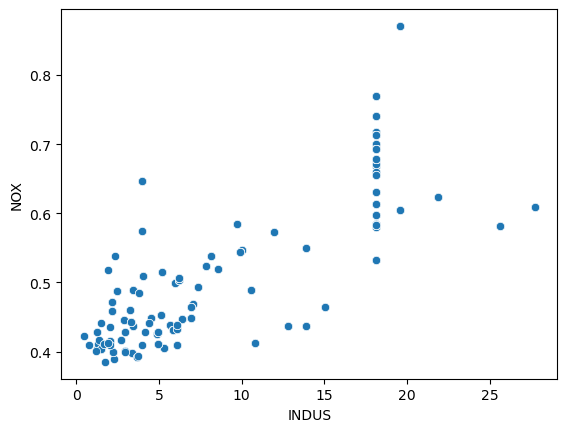

In [7]:
#Provide a scatter plot to show the relationship between
#Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship
sns.scatterplot(x='INDUS',y='NOX', data=df)

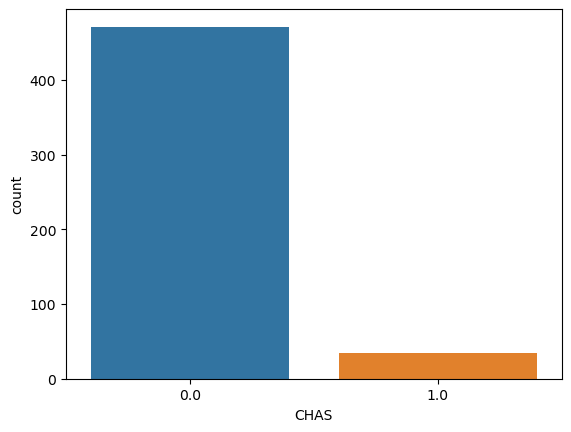

In [8]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# we reject the null hypothesis 
#houses_bounded_by_river = df[df['CHAS'] == 1]
#houses_not_bounded_by_river = df[df['CHAS'] == 0]
#t_stat, p_value = stats.ttest_ind(houses_bounded_by_river, houses_not_bounded_by_river, equal_var=False)
#print(t_stat,p_value)
ax=sns.countplot(data=df,x=df['CHAS'])

In [9]:
# Separate the data into two groups based on the CHAS variable
houses_bounded_by_river = df[df['CHAS'] == 1]['MEDV']
houses_not_bounded_by_river = df[df['CHAS'] == 0]['MEDV']
# Perform the t-test
t_stat, p_value = stats.ttest_ind(houses_bounded_by_river, houses_not_bounded_by_river, equal_var=False)
# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in median values of houses bounded by the Charles River.")
else:
    print("There is no significant difference in median values of houses bounded by the Charles River.")


<IPython.core.display.Javascript object>

T-statistic: 3.113291312794837
P-value: 0.003567170098137517
There is a significant difference in median values of houses bounded by the Charles River.


In [11]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
oneby4=df[df['AGE']<25.0]['MEDV']
oneby2=df[(df['AGE']<50.0) & (df['AGE']>=25.0)]['MEDV']
threeby4=df[(df['AGE']<75.0) & (df['AGE']>=50.0)]['MEDV']
one=df[(df['AGE']<=100.0) & (df['AGE']>=75.0)]['MEDV']
f_statistic,p_value=st.stats.f_oneway(oneby4,oneby2,threeby4,one)
print(f_statistic,p_value)
#YES THERE IS DIFFERENCE BETWEEN MEDV 

25.4866772097812 2.3178855286954125e-15


C:\Users\Mayank\AppData\Local\Temp\ipykernel_6244\3119460404.py:6: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  f_statistic,p_value=st.stats.f_oneway(oneby4,oneby2,threeby4,one)


In [12]:
df[df['AGE']>90.0]


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1,70 years and older
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5,NaN
10,10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,20.45,15.0,70 years and older
20,20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,21.02,13.6,70 years and older
22,22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2,70 years and older
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,18.06,15.2,70 years and older
489,489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,23.97,7.0,70 years and older
490,490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,29.68,8.1,70 years and older
491,491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,18.07,13.6,70 years and older


In [13]:
#Can we conclude that there is 
#no relationship between Nitric oxide concentrations(NOX) and proportion of non-retail business acres per town(INDUS)? (Pearson Correlation)

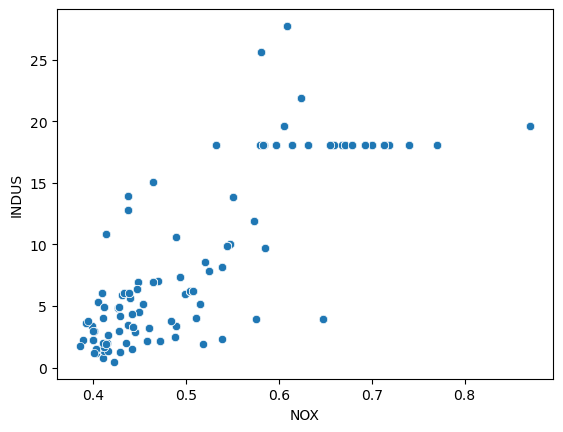

In [15]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=df)

In [16]:
st.pearsonr(df['NOX'], df['INDUS'])
#IF P<APLHA REJECT THE NULL HYPOTHESIS APLHA=0.05
#IF P>=ALPHA FAIL TO REJECT THE NULL HYPOTHESIS
#since p<alpha we reject the null hypothesis and conclude that their is correlation btw NOX & INDUS

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

In [18]:
#What is the impact of an additional 
#weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
import pandas as pd
import statsmodels.api as sm
X = df['DIS']
y = df['MEDV']
X = sm.add_constant(X)
# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        23:23:39   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [19]:
#This coefficient means that for every one-unit increase in the weighted distance to the employment centres, 
#the median value of owner-occupied homes increases by approximately 1.0916 units. 
#This positive coefficient suggests that homes further away from employment centres tend to have higher median values.